In [1]:
%matplotlib inline

import matplotlib.pyplot as plt # para sacar graficos
import pandas as pd
import numpy as np # Calculos matematicos
import seaborn as sns #graficos
import statistics # estadisticas
import scipy.stats as stats # estadisticas

### LECTURA DE DATOS

In [39]:
# creando data frame 

df = pd.read_csv("./spotify-2023.csv", encoding="latin-1")

## LIMPIEZA DE DATOS

In [40]:
# Limpieza de datos 
missing_values = df.isnull().sum()

data_types = df.dtypes

missing_values, data_types

(track_name               0
 artist(s)_name           0
 artist_count             0
 released_year            0
 released_month           0
 released_day             0
 in_spotify_playlists     0
 in_spotify_charts        0
 streams                  0
 in_apple_playlists       0
 in_apple_charts          0
 in_deezer_playlists      0
 in_deezer_charts         0
 in_shazam_charts        50
 bpm                      0
 key                     95
 mode                     0
 danceability_%           0
 valence_%                0
 energy_%                 0
 acousticness_%           0
 instrumentalness_%       0
 liveness_%               0
 speechiness_%            0
 dtype: int64,
 track_name              object
 artist(s)_name          object
 artist_count             int64
 released_year            int64
 released_month           int64
 released_day             int64
 in_spotify_playlists     int64
 in_spotify_charts        int64
 streams                 object
 in_apple_playlists      

In [41]:
shazam_mode = df['in_shazam_charts'].mode()[0]
key_mode = df['key'].mode()[0]
df['in_shazam_charts'].fillna(shazam_mode, inplace=True)
df['key'].fillna(key_mode, inplace=True)

non_numeric_streams = pd.to_numeric(df['streams'], errors='coerce').isna().sum()
non_numeric_deezer_playlists = pd.to_numeric(df['in_deezer_playlists'], errors='coerce').isna().sum()
non_numeric_shazam_charts = pd.to_numeric(df['in_shazam_charts'], errors='coerce').isna().sum()

non_numeric_streams, non_numeric_deezer_playlists, non_numeric_shazam_charts

(1, 79, 7)

In [42]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

df.dropna(subset=['streams', 'in_deezer_playlists', 'in_shazam_charts'], inplace=True)

cleaned_missing_values = df.isnull().sum()
cleaned_data_types = df.dtypes

cleaned_missing_values, cleaned_data_types

(track_name              0
 artist(s)_name          0
 artist_count            0
 released_year           0
 released_month          0
 released_day            0
 in_spotify_playlists    0
 in_spotify_charts       0
 streams                 0
 in_apple_playlists      0
 in_apple_charts         0
 in_deezer_playlists     0
 in_deezer_charts        0
 in_shazam_charts        0
 bpm                     0
 key                     0
 mode                    0
 danceability_%          0
 valence_%               0
 energy_%                0
 acousticness_%          0
 instrumentalness_%      0
 liveness_%              0
 speechiness_%           0
 dtype: int64,
 track_name               object
 artist(s)_name           object
 artist_count              int64
 released_year             int64
 released_month            int64
 released_day              int64
 in_spotify_playlists      int64
 in_spotify_charts         int64
 streams                 float64
 in_apple_playlists        int64
 in_app

In [43]:

#df['danceability_%'] = df['danceability_%'] / 100
df.head()
#df.info()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6


## DESCRIPCION DE LOS DATOS

In [44]:
numerical_stats = df.describe()

key_frequency = df['key'].value_counts()
mode_frequency = df['mode'].value_counts()

numerical_stats, key_frequency, mode_frequency

(       artist_count  released_year  released_month  released_day  \
 count    867.000000     867.000000      867.000000    867.000000   
 mean       1.574394    2019.223760        6.152249     14.147636   
 std        0.913051      10.570264        3.508798      9.005073   
 min        1.000000    1930.000000        1.000000      1.000000   
 25%        1.000000    2021.000000        3.000000      6.000000   
 50%        1.000000    2022.000000        6.000000     13.000000   
 75%        2.000000    2022.000000        9.000000     22.000000   
 max        8.000000    2023.000000       12.000000     31.000000   
 
        in_spotify_playlists  in_spotify_charts       streams  \
 count            867.000000         867.000000  8.670000e+02   
 mean            3371.915802          10.807382  4.058458e+08   
 std             4042.566785          18.111052  4.093741e+08   
 min               31.000000           0.000000  2.762000e+03   
 25%              817.500000           0.000000  1.3

# FRECUENCIA DE APARICION DE LOS ARTISTAS MAS SONADOS

In [45]:
#find frequency of each letter grade

frec_artista = pd.crosstab(index=df['artist(s)_name'], columns='count')
frec_artista = frec_artista.sort_values(by='count', ascending=False)
frec_artista



col_0,count
artist(s)_name,
Taylor Swift,33
The Weeknd,20
SZA,19
Bad Bunny,19
Harry Styles,16
...,...
"Halsey, Suga",1
"Halsey, BTS",1
Halsey,1


C:\Users\hugof\AppData\Local\Temp\ipykernel_20404\311222610.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')


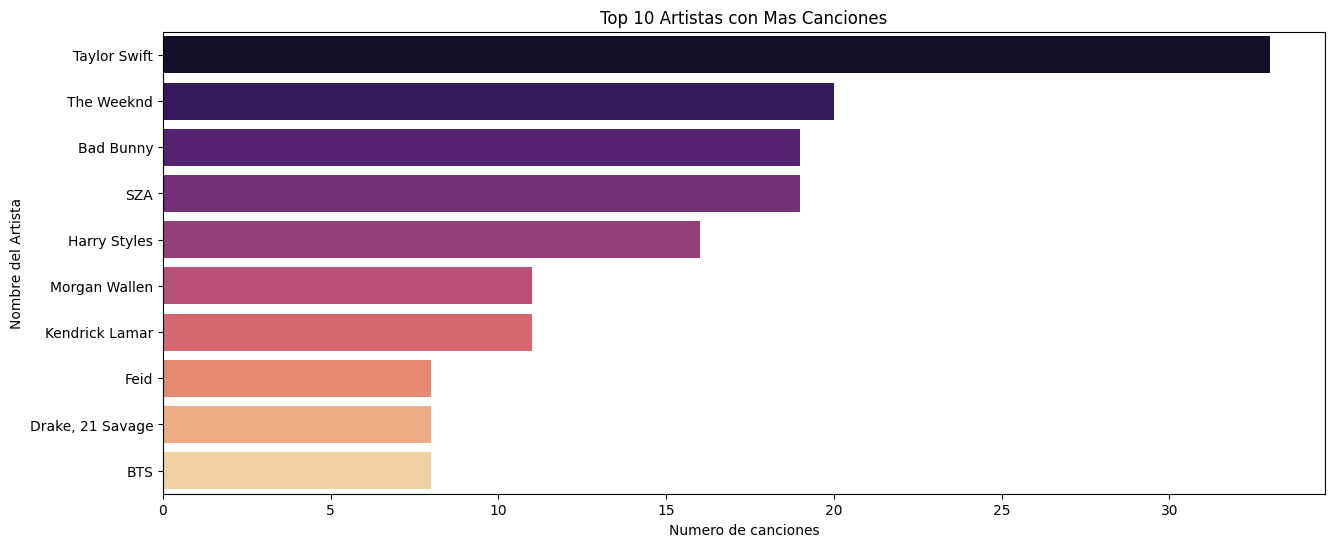

In [46]:
top_artists = df['artist(s)_name'].value_counts().head(10)

## plot
plt.figure(figsize=(15, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')
plt.xlabel('Numero de canciones')
plt.ylabel('Nombre del Artista')
plt.title('Top 10 Artistas con Mas Canciones')
plt.show()

# DISTRIBUCION POR TONALIDAD 

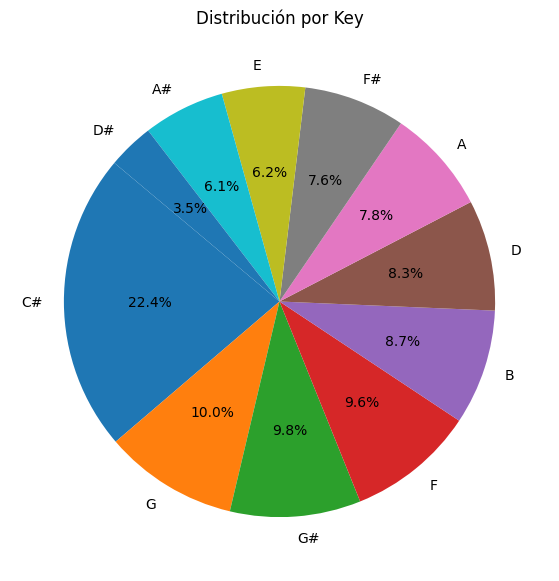

In [10]:
# Calcular el conteo de cada valor único en la columna 'key'
conteo_por_key = df['key'].value_counts()

# Crear el gráfico circular
plt.figure(figsize=(10, 7))  # Puedes ajustar el tamaño según tus necesidades
plt.pie(conteo_por_key, labels=conteo_por_key.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución por Key')
plt.show()

# CORRELACION ENTRE LOS BPM Y EL % DE BAILABILIDAD


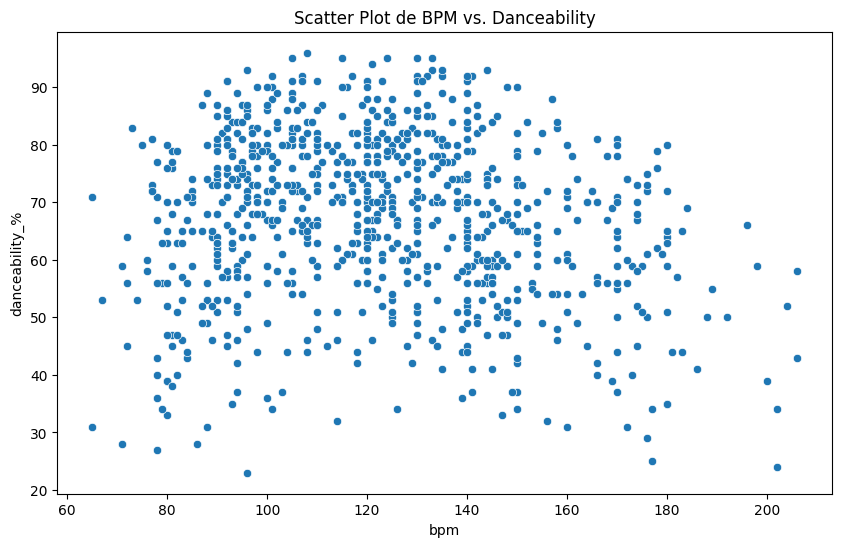

In [11]:
# Crear un scatter plot entre 'bpm' y 'danceability_%' usando Seaborn
plt.figure(figsize=(10, 6))  # Puedes ajustar el tamaño según tus necesidades
sns.scatterplot(x='bpm', y='danceability_%', data=df)
plt.title('Scatter Plot de BPM vs. Danceability')
plt.show()

# CORRELACION ENTRE STREAMS Y PLAYLIST EN SPOTIFY

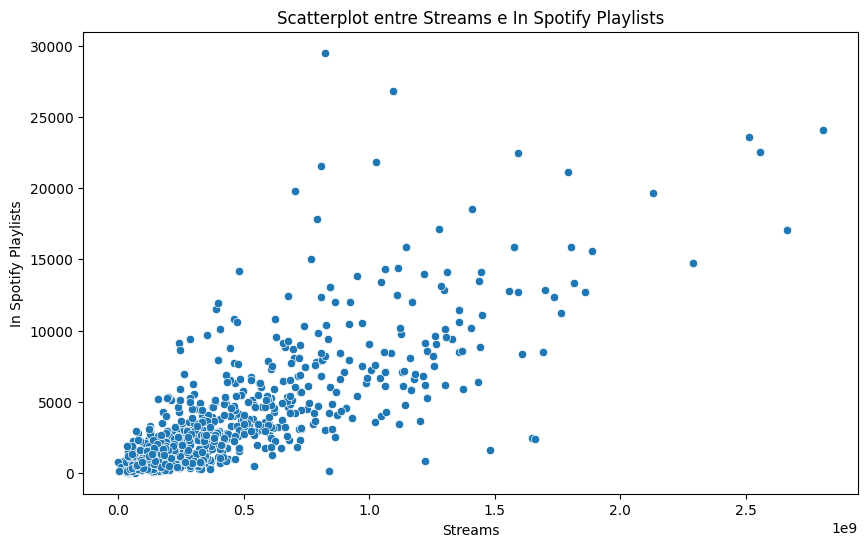

In [12]:
# Crear el scatterplot
plt.figure(figsize=(10, 6))  # Puedes ajustar el tamaño según tus necesidades
sns.scatterplot(x='streams', y='in_spotify_playlists', data=df)

plt.title('Scatterplot entre Streams e In Spotify Playlists')
plt.xlabel('Streams')
plt.ylabel('In Spotify Playlists')
plt.show()

# HISTOGRAMAS

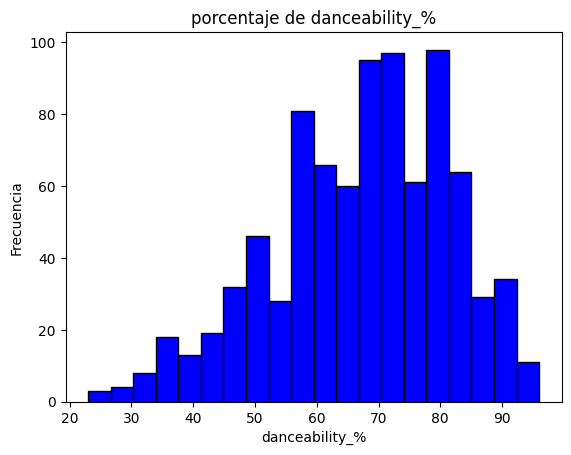

In [13]:
# Histograma con dance
plt.hist(df['danceability_%'], bins=20, color='blue', edgecolor='black')
plt.title('porcentaje de danceability_%')
plt.xlabel('danceability_%')
plt.ylabel('Frecuencia')
plt.show()

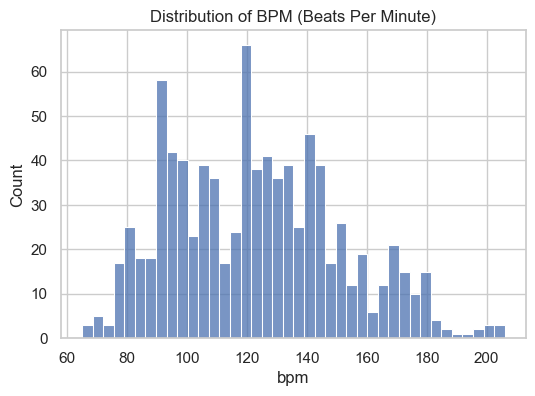

In [14]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear una figura con un solo subgráfico
fig, ax = plt.subplots(figsize=(6, 4))  # Ajusta el tamaño según tus necesidades

# BPM (Beats Per Minute)
sns.histplot(df['bpm'], bins=40, ax=ax)
ax.set_title('Distribution of BPM (Beats Per Minute)')

plt.show()

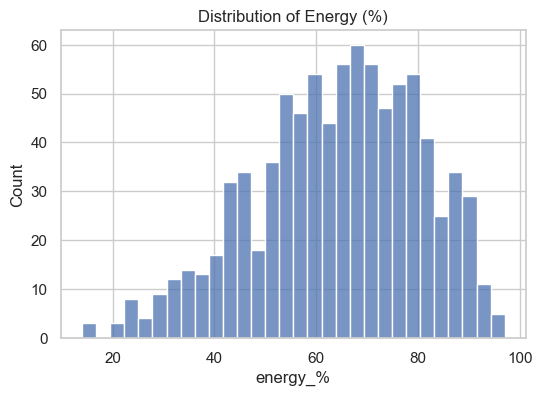

In [15]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear una figura con un solo subgráfico
fig, ax = plt.subplots(figsize=(6, 4))  # Ajusta el tamaño según tus necesidades

# Energy
sns.histplot(df['energy_%'], bins=30, ax=ax)
ax.set_title('Distribution of Energy (%)')


plt.show()

## BOXPLOT DE ENERGY

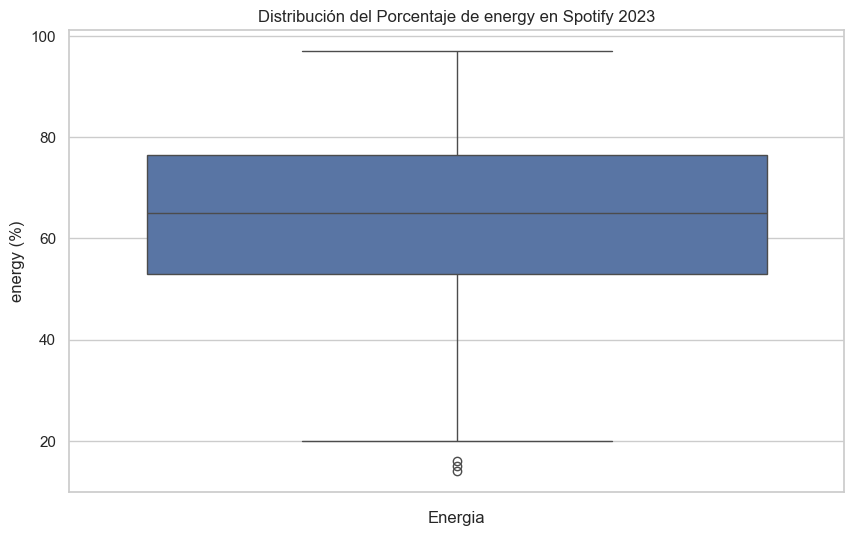

In [16]:
# Crear un boxplot
plt.figure(figsize=(10, 6)) # Ajusta el tamaño según necesites
sns.boxplot(y=df['energy_%'])
plt.title('Distribución del Porcentaje de energy en Spotify 2023')
plt.ylabel('energy (%)')
plt.xlabel('Energia') # Seaborn gestiona automáticamente las etiquetas del eje X para boxplots verticales
plt.show()

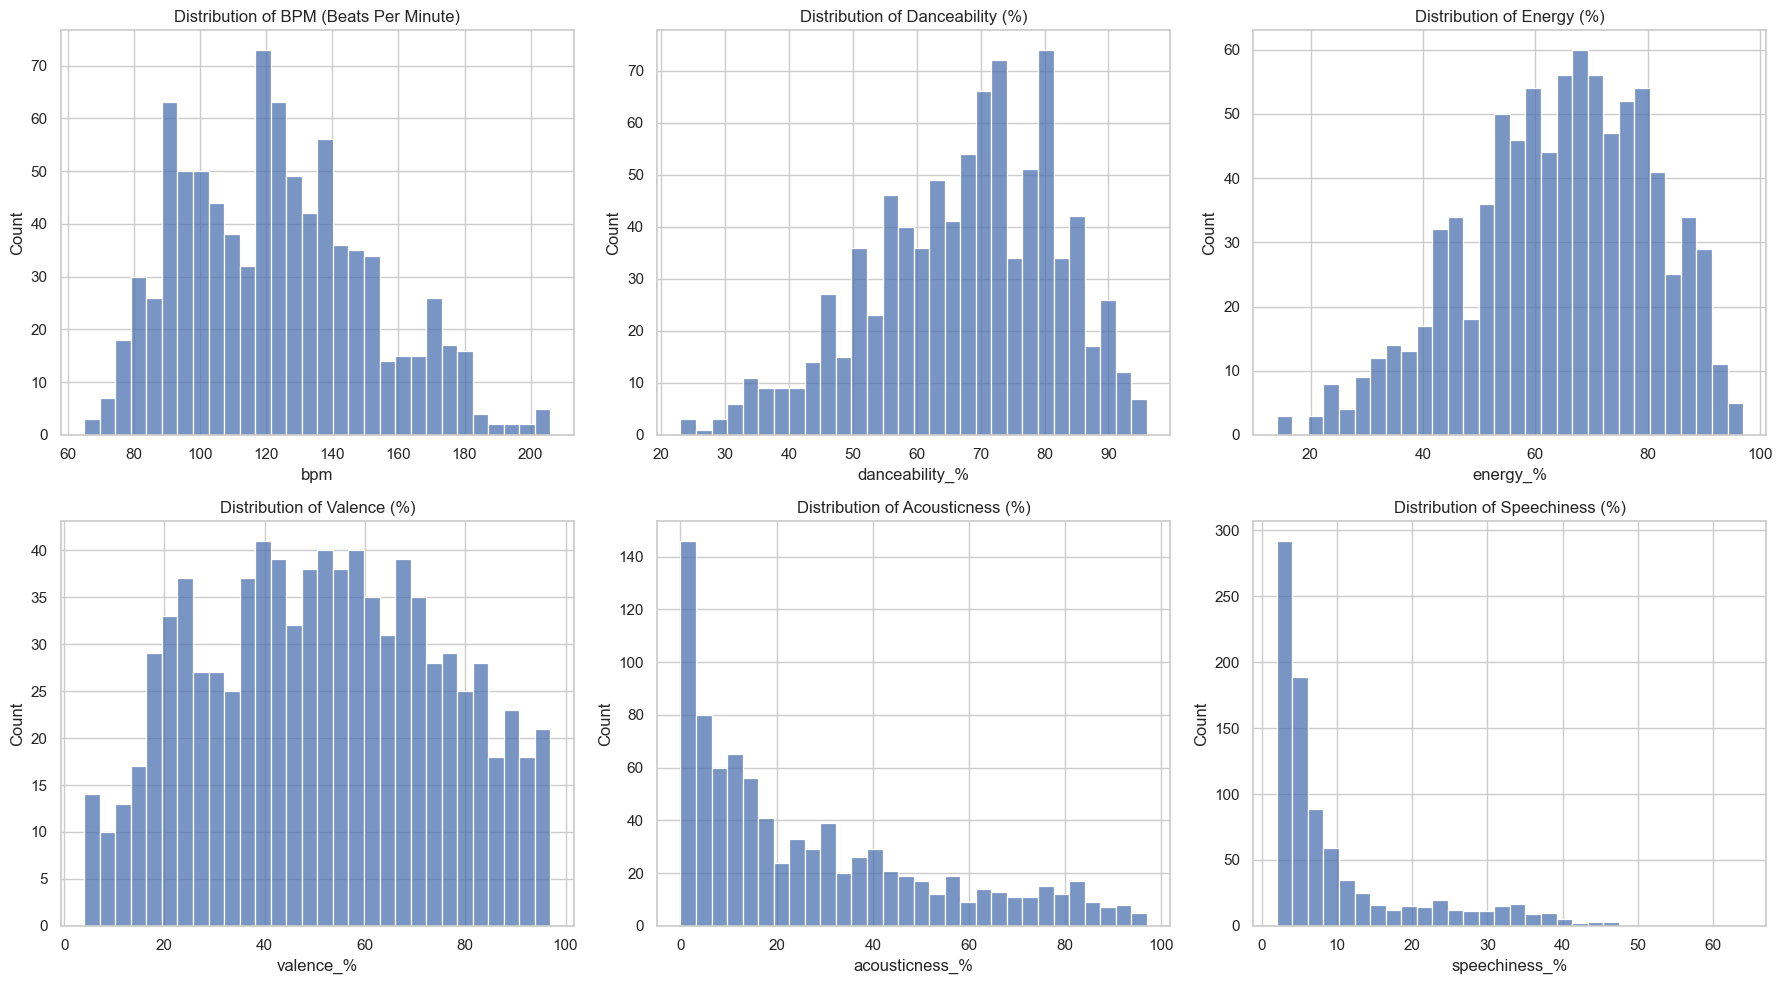

In [17]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# BPM (Beats Per Minute)
sns.histplot(df['bpm'], bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of BPM (Beats Per Minute)')

# Danceability
sns.histplot(df['danceability_%'], bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Danceability (%)')

# Energy
sns.histplot(df['energy_%'], bins=30, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Energy (%)')

# Valence
sns.histplot(df['valence_%'], bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Valence (%)')

# Acousticness
sns.histplot(df['acousticness_%'], bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Acousticness (%)')

# Speechiness
sns.histplot(df['speechiness_%'], bins=30, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Speechiness (%)')

plt.tight_layout()
plt.show()

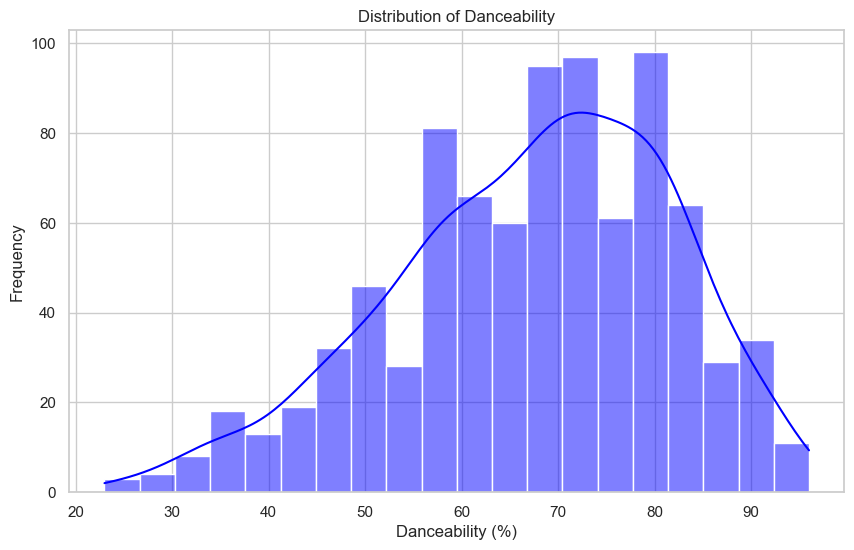

In [18]:
# Plot histogram for danceability
plt.figure(figsize=(10, 6))
sns.histplot(df['danceability_%'], bins=20, kde=True, color='blue')
plt.xlabel('Danceability (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Danceability')
plt.show()

Aquí exploramos el histograma de la distribución de la capacidad de baile en porcentaje. La mayoría de las canciones se agrupan en el rango del 60% al 80%, lo que sugiere una tendencia predominante

# HIPOTESIS

Se compara el número promedio de streams para las canciones lanzadas en 2020 con el valor hipotético de 4,000,000 streams, ya que el valor medio de las reproducciones de streams no toma en cuenta el año de lanzamiento.

- H0: La media de streams de reproducciones en el año 2020 es de 400.000.000
 
- H1: La media de streams de reproduccions en el año 2020 es diferente de 400.000.000

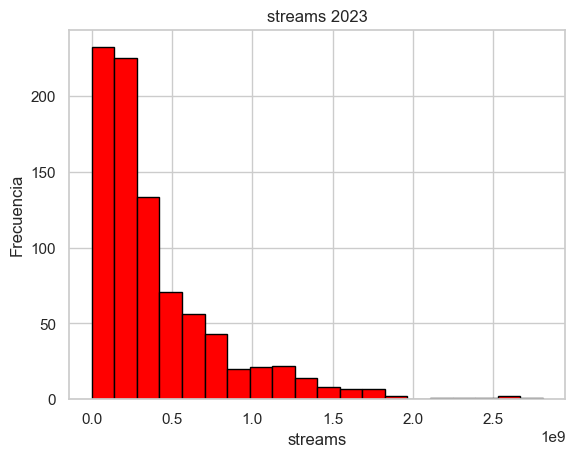

In [20]:
# Histograma streams - 
plt.hist(df['streams'], bins=20, color='red', edgecolor='black')
plt.title('streams 2023')
plt.xlabel('streams')
plt.ylabel('Frecuencia')
plt.show()

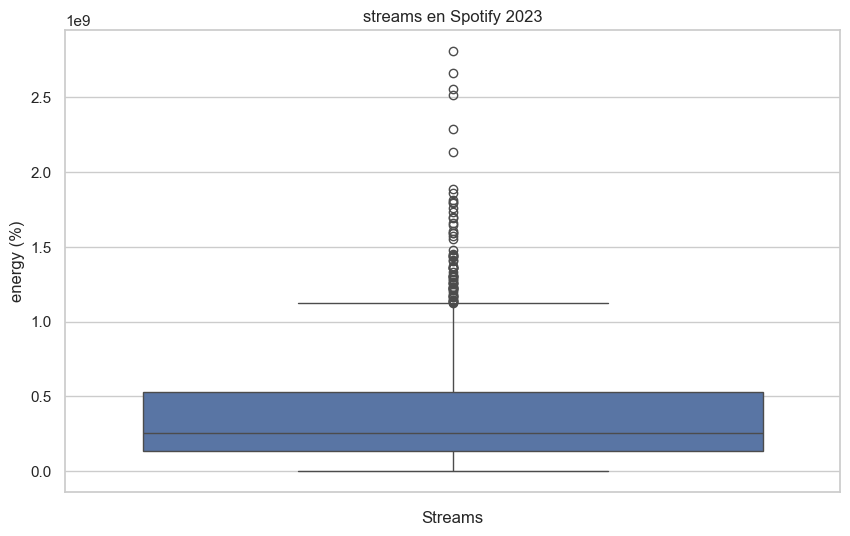

In [21]:
# Crear un boxplot
plt.figure(figsize=(10, 6)) # Ajusta el tamaño según necesites
sns.boxplot(y=df['streams'])
plt.title('streams en Spotify 2023')
plt.ylabel('energy (%)')
plt.xlabel('Streams') # Seaborn gestiona automáticamente las etiquetas del eje X para boxplots verticales
plt.show()

In [22]:
# Filtrando el DataFrame para obtener los streams del año 2020
streams_2020 = df[df['released_year'] == 2020]['streams']

# Valor hipotético de la media de streams para comparar
valor_hipotetico = 400000000

# Realizando el t-test de una muestra
t_value, p_value = stats.ttest_1samp(streams_2020, valor_hipotetico)

# Imprimiendo los resultados
print(f"T-Value: {t_value}")
print(f"P-Value: {p_value}")

# Interpretando los resultados
if p_value < 0.05:
    print("Rechazamos la hipótesis nula, la media de streams es significativamente diferente de 400,000,000.")
else:
    print("No rechazamos la hipótesis nula, no hay evidencia suficiente para decir que la media de streams es diferente de 400,000,000.")


T-Value: 5.70433497164408
P-Value: 1.726552799200923e-06
Rechazamos la hipótesis nula, la media de streams es significativamente diferente de 400,000,000.


In [23]:
# Filtrando el DataFrame para el año 2020
streams_2020 = df[df['released_year'] == 2020]['streams']

# Calculando la media muestral
media_muestral = np.mean(streams_2020)

# Calculando el intervalo de confianza del 95% para la media
confianza = 0.95
sem = stats.sem(streams_2020)  # Error estándar de la media
margen_error = sem * stats.t.ppf((1 + confianza) / 2., len(streams_2020)-1)
intervalo_confianza = (media_muestral - margen_error, media_muestral + margen_error)

# Imprimiendo los resultados
print(f"Media Muestral: {media_muestral}")
print(f"Intervalo de Confianza (95%): {intervalo_confianza}")

Media Muestral: 937938698.8378378
Intervalo de Confianza (95%): (746682355.4723978, 1129195042.2032778)


**Media Muestral:** 937,938,698.84, lo que indica que el promedio de streams para tu conjunto de datos es aproximadamente 938 millones.

**Intervalo de Confianza del 95%:** Entre aproximadamente 747 millones y 1,129 millones. Esto sugiere que hay un 95% de confianza de que la verdadera media de la población de streams se encuentra dentro de este rango


In [24]:
# Filtrando el DataFrame para el año 2021
streams_2021 = df[df['released_year'] == 2021]['streams']

# Calculando la media muestral
media_muestral = np.mean(streams_2021)

# Calculando el intervalo de confianza del 95% para la media
confianza = 0.95
sem = stats.sem(streams_2021)  # Error estándar de la media
margen_error = sem * stats.t.ppf((1 + confianza) / 2., len(streams_2021)-1)
intervalo_confianza = (media_muestral - margen_error, media_muestral + margen_error)

# Imprimiendo los resultados
print(f"Media Muestral: {media_muestral}")
print(f"Intervalo de Confianza (95%): {intervalo_confianza}")


Media Muestral: 620236159.9915966
Intervalo de Confianza (95%): (539863724.0934614, 700608595.8897318)


**Media Muestral:** 620,236,159, lo que indica que el promedio de streams para tu conjunto de datos es aproximadamente 620 millones.

**Intervalo de Confianza del 95%:** Entre aproximadamente 539 millones y 700 millones. Esto sugiere que hay un 95% de confianza de que la verdadera media de la población de streams se encuentra dentro de este rango

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 867 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            867 non-null    object 
 1   artist(s)_name        867 non-null    object 
 2   artist_count          867 non-null    int64  
 3   released_year         867 non-null    int64  
 4   released_month        867 non-null    int64  
 5   released_day          867 non-null    int64  
 6   in_spotify_playlists  867 non-null    int64  
 7   in_spotify_charts     867 non-null    int64  
 8   streams               867 non-null    float64
 9   in_apple_playlists    867 non-null    int64  
 10  in_apple_charts       867 non-null    int64  
 11  in_deezer_playlists   867 non-null    float64
 12  in_deezer_charts      867 non-null    int64  
 13  in_shazam_charts      867 non-null    float64
 14  bpm                   867 non-null    int64  
 15  key                   8

# PRUEBA ANOVA

Teniendo el dataset realizamos las siguientes acciones:

- **Hipótesis:**
El año de lanzamiento de una canción tiene un efecto significativo en su inclusión en las listas de reproducción de Spotify.


- **Variable Independiente:** año de lanzamiento (release_date).
- **Variable Dependiente:** Nro de veces que una canción aparece en las listas de reproducción de Spotify (in_spotify_playlists).

**Procedimiento:**

1. Se agrupa las canciones por año de lanzamiento.
2. Se calcula el promedio del número de apariciones en las listas de reproducción de Spotify para cada año.
3. Se realiza la prueba ANOVA para ver si hay diferencias significativas en el promedio de apariciones en listas de Spotify entre los diferentes años.

In [49]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


modelo = ols('in_spotify_playlists ~ C(released_year)', data=df).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)
print(anova_table)


                        sum_sq     df          F        PR(>F)
C(released_year)  6.016967e+09   40.0  15.272606  3.018762e-74
Residual          8.135505e+09  826.0        NaN           NaN


Esto significa que hay evidencia estadísticamente significativa para afirmar que el año de lanzamiento de una canción afecta su inclusión en las listas de reproducción de Spotify. En otras palabras, hay diferencias significativas en el número promedio de apariciones en las listas de reproducción de Spotify entre al menos algunos de los años.